## Problem Statement

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market.`

In [497]:
import numpy as np
import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

#### Load data set of bike sharing

In [498]:
df = pd.read_csv('day.csv')
df.head(10)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
5,6,06-01-2018,1,0,1,0,4,1,1,8.378268,11.66045,51.8261,6.000868,88,1518,1606
6,7,07-01-2018,1,0,1,0,5,1,2,8.057402,10.44195,49.8696,11.304642,148,1362,1510
7,8,08-01-2018,1,0,1,0,6,0,2,6.765000,8.11270,53.5833,17.875868,68,891,959
8,9,09-01-2018,1,0,1,0,0,0,1,5.671653,5.80875,43.4167,24.250650,54,768,822
9,10,10-01-2018,1,0,1,0,1,1,1,6.184153,7.54440,48.2917,14.958889,41,1280,1321


In [499]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


### As per the assignment, we need to predict the `cnt`

Looking at the dataset, data cleaning is not required, as there are no incorrect data type, and missing values.
But we need to do the categorial feature encoding, probably we can utilise the `pandas` to get the encoding.

In [500]:
df.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Plot the distribution of independent variables of dataset, againt the target variable `cnt`

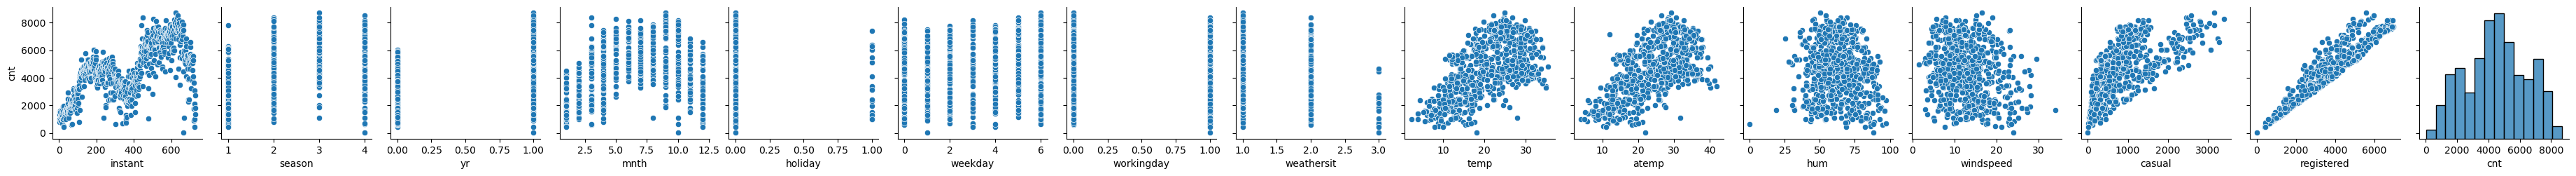

In [501]:
sns.pairplot(df, y_vars=['cnt'])

## Analysis of the pairplot


* Linear relationship between ‘cnt’ and ‘other independent variables’
    `atemp`
    `temp`
    `casual`
    `Registered`
* Second year had more `cnt` (count of total rental bikes).
* `cnt` tend to increase from 5th month to 10th month, it is sort of a normal distribution.
* `workingday` 0 have more `cnt`
* Non Holiday have more `cnt` (when `holiday` value is 0)```




### Looking at the correlation of the features with the target values.

/var/folders/cy/_bxt44g918l03tzf4n5brf7c0000gn/T/ipykernel_57103/202963147.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot:>

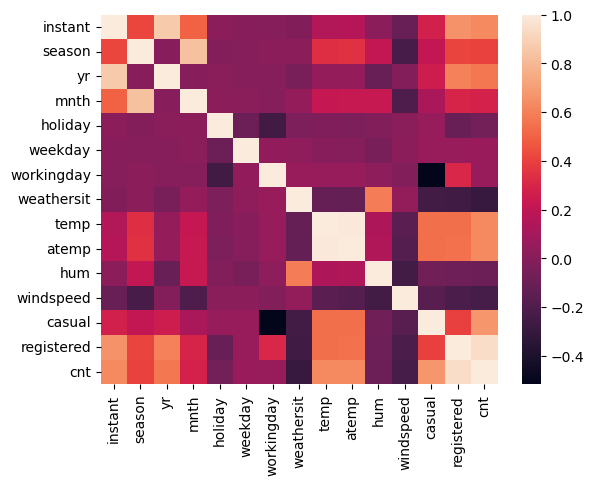

In [502]:
corr = df.corr()
sns.heatmap(corr)

#### After observing the corr matrix of the dataset, `cnt` is strongly correlated with the `registered` and `casual` features.

## Add the plotting of the other independent variables with the `cnt`

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

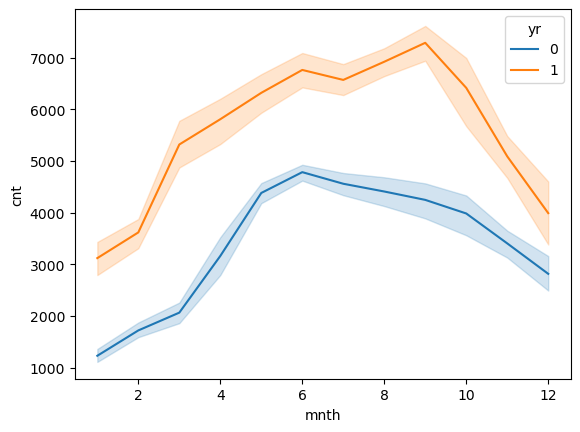

In [503]:
sns.lineplot(df, x='mnth', y='cnt', hue=df['yr'])

### `mnth` which describes the month column of the dataset, tend to follow the near to linear relationship with `cnt`

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

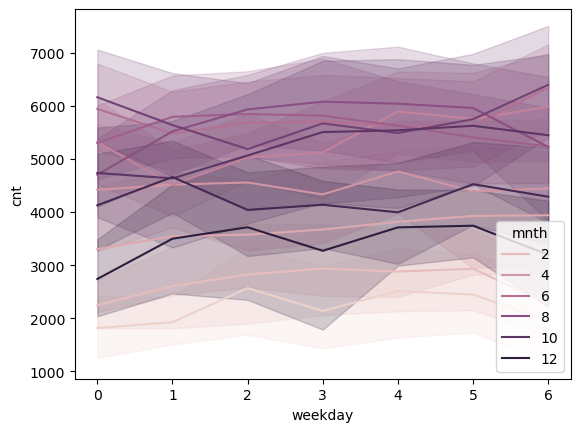

In [504]:
sns.lineplot(df, x='weekday', y='cnt', hue=df['mnth'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

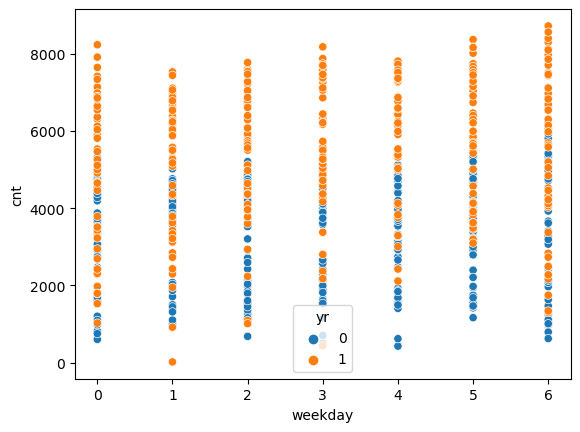

In [505]:
sns.scatterplot(df, x='weekday', y='cnt', hue=df['yr'])

<AxesSubplot:xlabel='weekday', ylabel='cnt'>

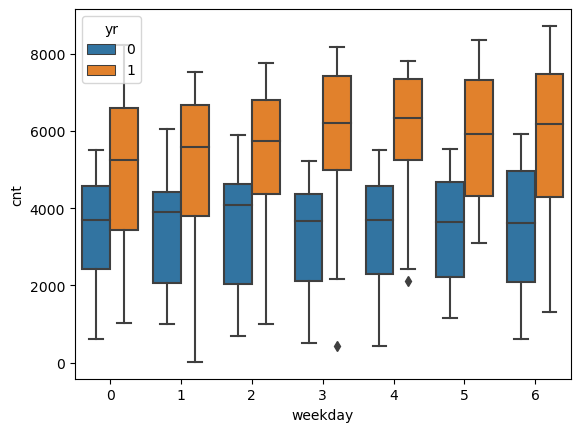

In [506]:
sns.boxplot(df, x='weekday', y='cnt', hue=df['yr'])

#### In year `1` (which is second year),  `cnt` tend to get increase towards the weekend.

<AxesSubplot:xlabel='mnth', ylabel='cnt'>

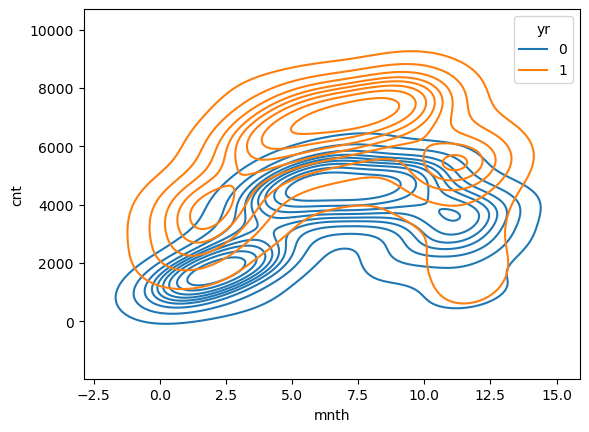

In [507]:
sns.kdeplot(df, x='mnth', y='cnt', hue=df['yr'])

<AxesSubplot:xlabel='yr', ylabel='cnt'>

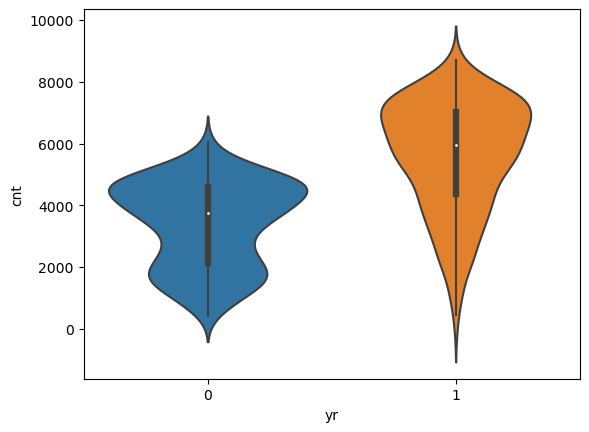

In [508]:
sns.violinplot(df, x=df['yr'], y=df['cnt'])

### Getting list of all the relevant categorical variables.

In [509]:
categorial_variables = ['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']
categorial_variables

['season', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

### Add the `OneHotEncoding` for the categorial variables
#### Dropping first to remove the multi-collinearity of the variables.

In [510]:
df = pd.get_dummies(df, columns=categorial_variables, drop_first=True)

### Delete the `date` column as we can capture the month, day, and yr relationship with the other encoded variables

In [511]:
df = df.drop('dteday', axis=1)
df

,instant,yr,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,...,holiday_1,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3
0,1,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,...,0,0,0,0,0,0,1,0,1,0
1,2,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,...,0,0,0,0,0,0,0,0,1,0
2,3,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,...,0,1,0,0,0,0,0,1,0,0
3,4,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,...,0,0,1,0,0,0,0,1,0,0
4,5,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,...,0,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,1,10.420847,11.33210,65.2917,23.458911,247,1867,2114,0,...,0,0,0,0,1,0,0,1,1,0
726,727,1,10.386653,12.75230,59.0000,10.416557,644,2451,3095,0,...,0,0,0,0,0,1,0,1,1,0
727,728,1,10.386653,12.12000,75.2917,8.333661,159,1182,1341,0,...,0,0,0,0,0,0,1,0,1,0
728,729,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796,0,...,0,0,0,0,0,0,0,0,0,0


### Renaming the `instant` variable, as `day_since_start`, which will depict the total days in the bike sharing business.

In [512]:
df['day_since_start'] = df['instant']
df = df.drop('instant', axis=1)
df.head()

,yr,temp,atemp,hum,windspeed,casual,registered,cnt,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,day_since_start
0,0,14.110847,18.18125,80.5833,10.749882,331,654,985,0,0,...,0,0,0,0,0,1,0,1,0,1
1,0,14.902598,17.68695,69.6087,16.652113,131,670,801,0,0,...,0,0,0,0,0,0,0,1,0,2
2,0,8.050924,9.47025,43.7273,16.636703,120,1229,1349,0,0,...,1,0,0,0,0,0,1,0,0,3
3,0,8.200000,10.60610,59.0435,10.739832,108,1454,1562,0,0,...,0,1,0,0,0,0,1,0,0,4
4,0,9.305237,11.46350,43.6957,12.522300,82,1518,1600,0,0,...,0,0,1,0,0,0,1,0,0,5


### Test - Train split using sklearn, In 30-70 ratio.
##### Below is partition is to separate the y, x.

In [513]:
features = list(df.columns)
features.remove('cnt')
X = df[columns]
X = df.drop('cnt', axis=1)
Y= df[['cnt']]


     yr       temp     atemp      hum  windspeed  casual  registered  \
0     0  14.110847  18.18125  80.5833  10.749882     331         654   
1     0  14.902598  17.68695  69.6087  16.652113     131         670   
2     0   8.050924   9.47025  43.7273  16.636703     120        1229   
3     0   8.200000  10.60610  59.0435  10.739832     108        1454   
4     0   9.305237  11.46350  43.6957  12.522300      82        1518   
..   ..        ...       ...      ...        ...     ...         ...   
725   1  10.420847  11.33210  65.2917  23.458911     247        1867   
726   1  10.386653  12.75230  59.0000  10.416557     644        2451   
727   1  10.386653  12.12000  75.2917   8.333661     159        1182   
728   1  10.489153  11.58500  48.3333  23.500518     364        1432   
729   1   8.849153  11.17435  57.7500  10.374682     439        2290   

     season_2  season_3  season_4  ...  weekday_1  weekday_2  weekday_3  \
0           0         0         0  ...          0          0

In [514]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=100)

In [515]:
X_train

,yr,temp,atemp,hum,windspeed,casual,registered,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,day_since_start
653,1,19.201653,23.04230,55.8333,12.208807,922,6612,0,0,1,...,0,1,0,0,0,0,1,0,0,654
576,1,29.246653,33.14480,70.4167,11.083475,968,6248,0,1,0,...,0,1,0,0,0,0,1,0,0,577
426,1,16.980847,20.67460,62.1250,10.792293,956,3110,0,0,0,...,0,0,0,0,0,1,0,1,0,427
728,1,10.489153,11.58500,48.3333,23.500518,364,1432,0,0,0,...,0,0,0,0,0,0,0,0,0,729
482,1,15.443347,18.87520,48.9583,8.708325,1120,3100,1,0,0,...,0,0,0,0,0,1,0,1,0,483
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,1,30.852500,35.35440,65.9583,8.666718,983,6278,0,1,0,...,0,0,0,1,0,0,1,0,0,579
53,0,9.091299,12.28585,42.3043,6.305571,139,1778,0,0,0,...,0,0,1,0,0,0,1,0,0,54
350,0,10.591653,12.46855,56.0833,16.292189,275,2464,0,0,1,...,0,0,0,0,0,1,0,1,0,351
79,0,17.647835,20.48675,73.7391,19.348461,401,1676,1,0,0,...,1,0,0,0,0,0,1,1,0,80


### Min-Max scale the train data set.


In [516]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled = pd.DataFrame(X_train_scaled, columns=features)
X_train_scaled.describe()

,yr,temp,atemp,hum,windspeed,casual,registered,season_2,season_3,season_4,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weathersit_2,weathersit_3,day_since_start
count,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,...,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,0.508806,0.537386,0.513133,0.650333,0.320844,0.254739,0.524618,0.246575,0.262231,0.248532,...,0.150685,0.133072,0.158513,0.133072,0.127202,0.154599,0.677104,0.344423,0.029354,0.505822
std,0.500412,0.225640,0.212202,0.145741,0.169639,0.205816,0.228459,0.431440,0.440279,0.432585,...,0.358092,0.339986,0.365579,0.339986,0.333525,0.361876,0.468042,0.475645,0.168963,0.288146
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.341151,0.332910,0.538858,0.199179,0.094483,0.354100,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.256181
50%,1.000000,0.542077,0.529300,0.653499,0.298098,0.213045,0.525267,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.512363
75%,1.000000,0.735215,0.688457,0.754401,0.414438,0.327187,0.697372,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.758929
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Select features using the RFE

In [517]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [518]:
model = LinearRegression()
selector = RFE(model, step=1)
selector.fit(X_train_scaled, y_train)

RFE(estimator=LinearRegression())

In [519]:
selector

RFE(estimator=LinearRegression())

### Select the recommended features by the RFE.

In [520]:
selected_features = selector.get_feature_names_out()
selected_features

array(['yr', 'atemp', 'windspeed', 'casual', 'registered', 'season_4',
       'mnth_2', 'mnth_3', 'mnth_5', 'mnth_6', 'mnth_10', 'mnth_12',
       'holiday_1', 'weekday_1', 'weathersit_3', 'day_since_start'],
      dtype=object)

In [521]:
X_train_scaled = X_train_scaled[selected_features]
X_train_scaled

,yr,atemp,windspeed,casual,registered,season_4,mnth_2,mnth_3,mnth_5,mnth_6,mnth_10,mnth_12,holiday_1,weekday_1,weathersit_3,day_since_start
0,1.0,0.501133,0.300794,0.280402,0.951776,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.896978
1,1.0,0.766351,0.264686,0.294422,0.899220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.791209
2,1.0,0.438975,0.255342,0.290765,0.446145,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.585165
3,1.0,0.200348,0.663106,0.110332,0.203869,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.000000
4,1.0,0.391735,0.188475,0.340750,0.444701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.662088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.0,0.824359,0.187140,0.298994,0.903552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.793956
507,0.0,0.218747,0.111379,0.041756,0.253826,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.072802
508,0.0,0.223544,0.431816,0.083206,0.352873,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.480769
509,0.0,0.434043,0.529881,0.121609,0.239099,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.108516


In [522]:
y_train = y_train.reset_index(drop=True)
y_train

,cnt
0,7534
1,7216
2,4066
3,1796
4,4220
...,...
506,7261
507,1917
508,2739
509,2077


### Using Statsmodels make multiple linear regression mode.

In [523]:

X_train_scaled_const = sm.add_constant(X_train_scaled)
model = sm.OLS(y_train, X_train_scaled_const)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.586e+30
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:34:25   Log-Likelihood:                 12294.
No. Observations:                 511   AIC:                        -2.455e+04
Df Residuals:                     494   BIC:                        -2.448e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              22.0000   1.82e-12   1.21e+13      0.000      22.000      22.000
yr               2.487e-12   3.12e-12      0.798      0.425   -3.64e-12    8.61e-12
atemp            6.253e-13   3.55e-12      0.176      0.860   -6.34e-12    7.59e-12
windspeed        1.563e-12   2.44e-12      0.640      0.523   -3.24e-12    6.36e-12
casual           3281.0000   2.48e-12   1.32e+15      0.000    3281.000    3281.000
registered       6926.0000   3.31e-12   2.09e+15      0.000    6926.000    6926.000
season_4         3.354e-12   1.81e-12      1.857      0.064   -1.94e-13     6.9e-12
mnth_2           2.078e-12   1.81e-12      1.151      0.250   -1.47e-12    5.63e-12
mnth_3           9.805e-13    1.5e-12      0.654      0.513   -1.96e-12    3.93e-12
mnth_5           1.132e-12   1.53e-12      0.742      0.459   -1.87e-12    4.13e-12
mnth_6           3.979e-13    1.6e-12      0.249      0.803   -2.74e-12    3.54e-12
mnth_10         -2.885e-12   1.76e-12     -1.640      0.102   -6.34e-12    5.71e-13
mnth_12         -2.771e-13   1.99e-12     -0.139      0.889   -4.19e-12    3.63e-12
holiday_1       -1.762e-12   2.64e-12     -0.667      0.505   -6.95e-12    3.43e-12
weekday_1       -1.581e-12   1.15e-12     -1.370      0.171   -3.85e-12    6.87e-13
weathersit_3    -1.091e-12   2.52e-12     -0.432      0.666   -6.05e-12    3.86e-12
day_since_start   3.88e-12   6.15e-12      0.630      0.529   -8.21e-12     1.6e-11
==============================================================================
Omnibus:                       31.580   Durbin-Watson:                   0.289
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               12.511
Skew:                          -0.088   Prob(JB):                      0.00192
Kurtosis:                       2.254   Cond. No.                         29.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Remove the predictors having high p-value and VIF

In [524]:
def calculate_vif(df):
    corr_matrix = df.corr()
    inv_corr_matrix = np.linalg.inv(corr_matrix.values)
    vif_values = pd.Series(np.diag(inv_corr_matrix), index=corr_matrix.index)
    return vif_values


In [525]:
calculate_vif(X_train_scaled)

yr                 16.180544
atemp               3.763863
windspeed           1.142076
casual              1.731502
registered          3.810821
season_4            4.055825
mnth_2              1.348296
mnth_3              1.321377
mnth_5              1.194349
mnth_6              1.197968
mnth_10             1.621978
mnth_12             2.031853
holiday_1           1.153156
weekday_1           1.135911
weathersit_3        1.207230
day_since_start    20.904664
dtype: float64

### Remove those predictors, which are having high VIF (>4.0)

In [526]:
high_VIF_predictors = ['yr', 'season_4', 'day_since_start']
X_train_scaled_const = X_train_scaled_const.drop(high_VIF_predictors, axis=1)
X_train_scaled_const

,const,atemp,windspeed,casual,registered,mnth_2,mnth_3,mnth_5,mnth_6,mnth_10,mnth_12,holiday_1,weekday_1,weathersit_3
0,1.0,0.501133,0.300794,0.280402,0.951776,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.766351,0.264686,0.294422,0.899220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.438975,0.255342,0.290765,0.446145,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.200348,0.663106,0.110332,0.203869,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.391735,0.188475,0.340750,0.444701,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
506,1.0,0.824359,0.187140,0.298994,0.903552,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
507,1.0,0.218747,0.111379,0.041756,0.253826,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
508,1.0,0.223544,0.431816,0.083206,0.352873,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
509,1.0,0.434043,0.529881,0.121609,0.239099,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Remove those predictors having the large p-value
#### Which indicates that null-hypothesis is not rejected.

In [527]:
# Selecting predictors having p-value > 0.5

high_p_value_predictors = ['mnth_12', 'mnth_6', 'mnth_3']
X_train_scaled_const = X_train_scaled_const.drop(high_p_value_predictors, axis=1)
X_train_scaled_const

,const,atemp,windspeed,casual,registered,mnth_2,mnth_5,mnth_10,holiday_1,weekday_1,weathersit_3
0,1.0,0.501133,0.300794,0.280402,0.951776,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.766351,0.264686,0.294422,0.899220,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.438975,0.255342,0.290765,0.446145,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.200348,0.663106,0.110332,0.203869,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.391735,0.188475,0.340750,0.444701,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
506,1.0,0.824359,0.187140,0.298994,0.903552,0.0,0.0,0.0,0.0,0.0,0.0
507,1.0,0.218747,0.111379,0.041756,0.253826,1.0,0.0,0.0,0.0,0.0,0.0
508,1.0,0.223544,0.431816,0.083206,0.352873,0.0,0.0,0.0,0.0,0.0,0.0
509,1.0,0.434043,0.529881,0.121609,0.239099,0.0,0.0,0.0,0.0,1.0,0.0


### Although, `atemp` and `windspeed` have high p-value, lets remove the `['mnth_12', 'mnth_6', 'mnth_3']` and see if p-value changes

In [528]:
model = sm.OLS(y_train, X_train_scaled_const)
model = model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.926e+29
Date:                Wed, 20 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:34:25   Log-Likelihood:                 11814.
No. Observations:                 511   AIC:                        -2.361e+04
Df Residuals:                     500   BIC:                        -2.356e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           22.0000   4.03e-12   5.46e+12      0.000      22.000      22.000
atemp         9.898e-12   6.45e-12      1.533      0.126   -2.78e-12    2.26e-11
windspeed     3.354e-12   6.04e-12      0.555      0.579   -8.51e-12    1.52e-11
casual        3281.0000   6.02e-12   5.45e+14      0.000    3281.000    3281.000
registered    6926.0000   5.51e-12   1.26e+15      0.000    6926.000    6926.000
mnth_2        1.464e-12    4.2e-12      0.349      0.727   -6.78e-12    9.71e-12
mnth_5       -1.201e-12   3.62e-12     -0.332      0.740   -8.31e-12    5.91e-12
mnth_10       3.993e-12   3.62e-12      1.103      0.270   -3.12e-12    1.11e-11
holiday_1     3.531e-12   6.62e-12      0.533      0.594   -9.47e-12    1.65e-11
weekday_1      6.75e-14   2.93e-12      0.023      0.982   -5.68e-12    5.82e-12
weathersit_3  3.148e-12   6.18e-12      0.509      0.611   -8.99e-12    1.53e-11
==============================================================================
Omnibus:                       12.466   Durbin-Watson:                   0.028
Prob(Omnibus):                  0.002   Jarque-Bera (JB):                6.796
Skew:                           0.038   Prob(JB):                       0.0334
Kurtosis:                       2.440   Cond. No.                         10.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Let's calculate the VIF again and remove the predictor having chances of Multicollinearity

In [529]:
calculate_vif(X_train_scaled_const.drop('const', axis=1))

atemp           1.930459
windspeed       1.079564
casual          1.578060
registered      1.632404
mnth_2          1.128157
mnth_5          1.041312
mnth_10         1.062382
holiday_1       1.120006
weekday_1       1.130445
weathersit_3    1.121514
dtype: float64

#### VIF seems to be okay now.

### Prepare  `y_test` for the prediction

In [530]:
y_test.reset_index(drop=True, inplace=True)

### Transform `X_test` using MinMax scaler

In [531]:
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=features)
X_test_scaled = X_test_scaled[['atemp', 'windspeed', 'casual', 'registered', 'mnth_2', 'mnth_5', 'mnth_10', 'holiday_1', 'weekday_1', 'weathersit_3']]
X_test_scaled

,atemp,windspeed,casual,registered,mnth_2,mnth_5,mnth_10,holiday_1,weekday_1,weathersit_3
0,0.769660,0.084219,0.933557,0.427086,0.0,0.0,0.0,1.0,1.0,0.0
1,0.842587,0.153728,0.265163,0.767976,0.0,0.0,0.0,0.0,0.0,0.0
2,0.496145,0.334206,0.072539,0.346376,0.0,0.0,1.0,0.0,0.0,0.0
3,0.795343,0.339570,0.268820,0.559630,0.0,0.0,0.0,0.0,0.0,0.0
4,0.741471,0.537414,0.223712,0.608143,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
214,0.243430,0.287411,0.096312,0.376697,1.0,0.0,0.0,0.0,0.0,0.0
215,0.511907,0.283397,0.167327,0.871354,0.0,0.0,0.0,0.0,0.0,0.0
216,0.577380,0.069510,0.426394,0.420445,0.0,1.0,0.0,0.0,0.0,0.0
217,0.682653,0.052115,0.221274,0.985273,0.0,0.0,1.0,0.0,0.0,0.0


In [532]:
X_test_scaled.describe()

,atemp,windspeed,casual,registered,mnth_2,mnth_5,mnth_10,holiday_1,weekday_1,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.532991,0.313350,0.266372,0.527146,0.100457,0.086758,0.082192,0.036530,0.127854,0.027397
std,0.217888,0.159947,0.217246,0.217921,0.301297,0.282125,0.275286,0.188034,0.334692,0.163612
min,0.025950,-0.042808,0.002133,0.059486,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.344751,0.198517,0.101951,0.359154,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.549198,0.299459,0.223712,0.526567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.714132,0.403048,0.362085,0.664742,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.980934,0.807474,1.038708,0.985273,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [533]:
X_test_scaled_const = sm.add_constant(X_test_scaled)
X_test_scaled_const

,const,atemp,windspeed,casual,registered,mnth_2,mnth_5,mnth_10,holiday_1,weekday_1,weathersit_3
0,1.0,0.769660,0.084219,0.933557,0.427086,0.0,0.0,0.0,1.0,1.0,0.0
1,1.0,0.842587,0.153728,0.265163,0.767976,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.496145,0.334206,0.072539,0.346376,0.0,0.0,1.0,0.0,0.0,0.0
3,1.0,0.795343,0.339570,0.268820,0.559630,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.741471,0.537414,0.223712,0.608143,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
214,1.0,0.243430,0.287411,0.096312,0.376697,1.0,0.0,0.0,0.0,0.0,0.0
215,1.0,0.511907,0.283397,0.167327,0.871354,0.0,0.0,0.0,0.0,0.0,0.0
216,1.0,0.577380,0.069510,0.426394,0.420445,0.0,1.0,0.0,0.0,0.0,0.0
217,1.0,0.682653,0.052115,0.221274,0.985273,0.0,0.0,1.0,0.0,0.0,0.0


### Get prediction on the `X_test` dataset

In [534]:
y_pred = model.predict(X_test_scaled_const)

In [535]:
from sklearn.metrics import r2_score

r2_score(y_test['cnt'], y_pred)

1.0

### Plotting the Q-Q plot, to see whether model flows the assumptions of the linear regression.

0   -2.637535e-11
1   -2.455636e-11
2   -2.501110e-11
3   -2.455636e-11
4   -2.364686e-11
dtype: float64


<AxesSubplot:ylabel='Count'>

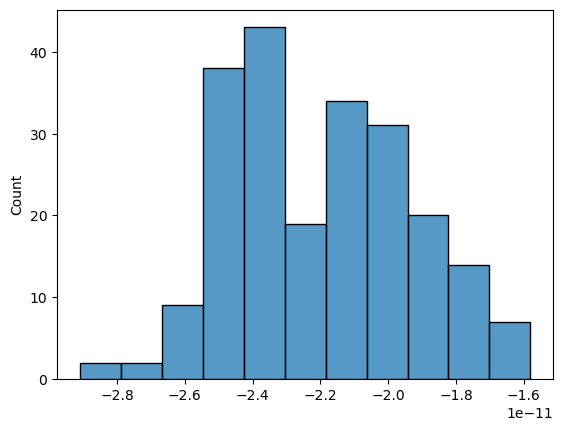

In [536]:
residuals = y_test['cnt'] - y_pred
print(residuals.head(5))

sns.histplot(residuals)


#### Residuals seems to follow the normal distribution, which is assumption of the linear regression.

<AxesSubplot:ylabel='Density'>

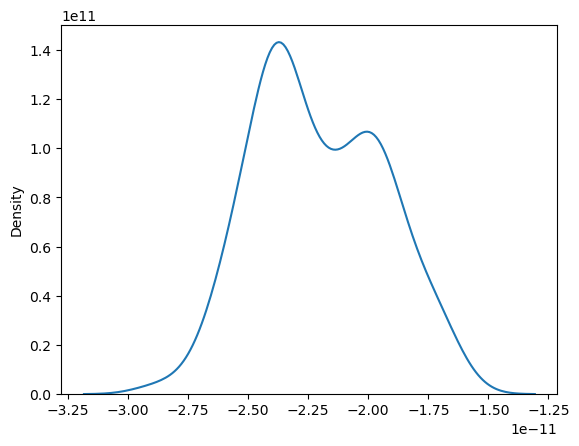

In [537]:
sns.kdeplot(residuals)

### Get prediction on the X_train dataset

In [538]:
y_pred = model.predict(X_train_scaled_const)

r2_score(y_train, y_pred)

1.0

### Why GOD level `r2_score` ?? :( 
#### Didn't have enough time, just submiting before the last deadline.